# Operating System Project








Enter the number from the menu: 
1- Priority
2- Perimitive SJF
3- Round Robin
4- Non-Primitive SJF
5- First Come, First Served (FCFS)
3
Round Robin Scheduler
Enter number of processes: 5
Enter Time Quantum: 2
Burst Time for P1: 12
Burst Time for P2: 5
Burst Time for P3: 7
Burst Time for P4: 1
Burst Time for P5: 2

 Process  Burst Time  Waiting Time  Turnaround Time  Response Time
     P1          12            15               27              0
     P2           5            13               18              2
     P3           7            16               23              4
     P4           1             6                7              6
     P5           2             7                9              7

Average Waiting Time   : 11.40
Average Turnaround Time: 16.80
Average Response Time  : 3.80
Number of Context Switches: 14


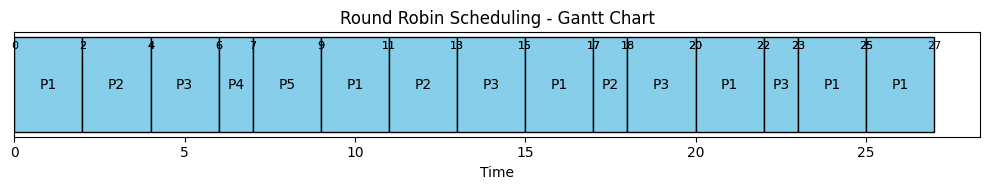

In [ ]:
# @title Master function

available_functions = {
    "1": main_function_1,
    "2": main_function_2,
    "3": main_function_3,
    "4": main_function_4,
    "5": main_function_5
}

# Ask the user to choose a function to run
selected_function = input("Enter the number from the menu: \n1- Priority\n2- Perimitive SJF\n3- Round Robin\n4- Non-Primitive SJF\n5- First Come, First Served (FCFS)\n")

# Execute the selected function
if selected_function in available_functions:
    available_functions[selected_function]()
else:
    print("Invalid selection. Please choose a number between 1 and 5.")


In [ ]:
# @title priority
import matplotlib.pyplot as plt
from tabulate import tabulate

# Priority خورازمية
def priority_scheduling(processes):
    #تنظيم على اساس الاولوية
    processes.sort(key=lambda x: x['priority'])

    print("\nProcess Execution Order based on Priority Scheduling:")
    total_wait_time = 0
    total_turnaround_time = 0
    time_elapsed = 0

    process_table = []  # تخزين البيانات لعرضها على شكل جدول

    process_names = []
    start_times = []
    burst_times = []
    turnaround_times = []

    for process in processes:
        # حساب wait time و turnaround time
        wait_time = time_elapsed
        turnaround_time = wait_time + process['burst_time']

        total_wait_time += wait_time
        total_turnaround_time += turnaround_time

        # توصيل معلومات البروسيس الى الجدول
        process_table.append([process['name'], process['burst_time'], wait_time, turnaround_time])

        # تحديث الوقت بشكل مستمر
        process_names.append(process['name'])
        start_times.append(time_elapsed)
        burst_times.append(process['burst_time'])
        turnaround_times.append(turnaround_time)
        time_elapsed += process['burst_time']

    avg_wait_time = total_wait_time / len(processes)
    avg_turnaround_time = total_turnaround_time / len(processes)

    # عرض المعلومات على شكل جدول
    print(tabulate(process_table, headers=["🔤 Process", "⏲️ Burst Time   ", "⏱️ Waiting Time   ", "⏳ Turnaround Time   "], tablefmt="grid"))
    print(f"\n🕒 Average Waiting Time: {avg_wait_time:.2f}")
    print(f"⏳ Average Turnaround Time: {avg_turnaround_time:.2f}")

    # تصوير البروسيس على شكل Gantt-Chart
    plt.figure(figsize=(14, 2))

    # عرض Gantt-Chart
    for i, process in enumerate(process_names):
        plt.barh(0.4, burst_times[i], left=start_times[i], color='lightblue', edgecolor='black', height=0.8)
        plt.text(start_times[i] + burst_times[i] / 2, 0.4, process, ha='center', va='center', color='black', fontsize=30)
    # عرض معلومات الوقت في الشكل
    for start, burst in zip(start_times, burst_times):
        plt.text(start, -0.2, f"{start}", ha='center', va='center', fontsize=25)
    plt.text(start_times[-1] + burst_times[-1], -0.2, f"{start_times[-1] + burst_times[-1]}", ha='center', va='center', fontsize=25)

    plt.yticks([])
    plt.xticks([])
    plt.title('Gantt Chart - Priority Scheduling')
    plt.tight_layout()
    plt.show()

# Main function
def main_function_1():
    print("Running main function 1")

    processes = []
    num_processes = int(input(" \"⭐ priority scheduling خوارزمية الاولوية ⭐\" \n \n Enter the number of processes: "))

    for i in range(num_processes):
        name = f"P{i + 1}"
        print(f"\nProcess {name}:")
        priority = int(input(f"🔢 Enter priority : "))
        burst_time = int(input(f"⏲️ Enter burst time : "))
        processes.append({'name': name, 'priority': priority, 'burst_time': burst_time})

    priority_scheduling(processes)



In [ ]:
# @title primitive SJF

import matplotlib.pyplot as plt

# === خوارزمية SJF Preemptive (SRTF) مختصرة ===

def srtf(at, bt):
    n = len(bt) # عدد العمليات


    rt = bt.copy() # # rt = وقت التنفيذ المتبقي لكل عملية
    wt = [0]*n # أوقات الانتظار (Waiting Time)

    tat = [0]*n # أوقات الدوران (Turnaround Time)

    rt_time = [-1]*n  # وقت الاستجابة (Response Time)

    gantt = []  # لتخزين مخطط جانت
    t = complete = 0 ## t = الزمن الحالي، complete = عدد العمليات المنتهية

    while complete < n:
        ready = [i for i in range(n) if at[i] <= t and rt[i] > 0]  # البحث عن عمليه جاهزه للتنفيذ

        if not ready:# العمليات الي مو جاهزة
            gantt.append("Idle")
            t += 1 # نزيد الوقت 1 ونكمل
            continue

        j = min(ready, key=lambda i: rt[i]) # يختار العملية الجاهزة الي باقي فيها  أقل وقت تنفيذ متبقي
        if rt_time[j] < 0:# إذا هذه أول مرة تُنفذ العملية، يتم تسجيل وقت الاستجابة

            rt_time[j] = t - at[j] # إذا هذه أول مرة تُنفذ العملية، يتم تسجيل وقت الاستجابة

  # تشغيل العملية

        rt[j] -= 1 # ننقص من وقتها
        gantt.append(f"P{j+1}") # نضيفها الى مخطط جانت

        if rt[j] == 0:
            complete += 1
            finish = t + 1
            wt[j] = max(0, finish - bt[j] - at[j]) # اذا انتهت العملية نحسب وقت الانتظار

            tat[j] = bt[j] + wt[j] # نحسب وقت الدوران

        t += 1

    return wt, tat, rt_time, gantt

# === الدالة الرئيسية والرسم ===
def main_function_2():
    n = int(input("أدخل عدد العمليات: "))
    at = [int(input(f"وقت الوصول P{i+1}: ")) for i in range(n)]
    bt = [int(input(f"وقت التنفيذ P{i+1}: ")) for i in range(n)]

    wt, tat, rt_time, gantt = srtf(at, bt)

    # ضغط الفترات في مخطط جانت
    comp = []
    cur = gantt[0]; start = 0
    for i, g in enumerate(gantt[1:], 1):
        if g != cur:
            comp.append((cur, start, i))
            cur, start = g, i
    comp.append((cur, start, len(gantt)))

    # رسم الجدول
    fig, axs = plt.subplots(2, 1, figsize=(12, 5), gridspec_kw={'height_ratios': [1, 2]})
    axs[0].axis('off')
    cols = ['Process', 'Arrival', 'Burst', 'Waiting', 'Turnaround', 'Response']
    rows = [[f"P{i+1}", at[i], bt[i], wt[i], tat[i], rt_time[i]] for i in range(n)]
    axs[0].table(cellText=rows, colLabels=cols, loc='center').scale(1, 2)

    # رسم جانت
    for task, s, e in comp:
        axs[1].barh(0, e - s, left=s, edgecolor='black')
        axs[1].text((s + e) / 2, 0, task, va='center', ha='center', color='white', fontsize=9)

    axs[1].set(xlim=(0, len(gantt)), yticks=[], xticks=range(len(gantt)+1), title='Gantt Chart - SRTF')
    axs[1].grid(axis='x')
    plt.tight_layout()
    plt.show()



In [ ]:
# @title Round Robin (RR)
import matplotlib.pyplot as plt
import pandas as pd

def main_function_3():
    print("Round Robin Scheduler")

    # Input # of processes and time quantum
    n = int(input("Enter number of processes: "))
    quantum = int(input("Enter Time Quantum: "))

    #Create process names and input their burst times
    processes = [f"P{i+1}" for i in range(n)]
    burst_times = [int(input(f"Burst Time for {p}: ")) for p in processes]

    # Initialize data structures
    remaining_bt = burst_times.copy()      # Remaining burst time for each process
    waiting = [0] * n                      # Waiting time for each process
    turnaround = [0] * n                   # Turnaround time for each process
    response = [-1] * n                    # Response time, initialized to -1 (not started yet)
    timeline = []                          # To store execution order and times for Gantt Chart
    current_time = 0                       # Current time in the schedule

    # RR execution loop
    while True:
        done = True # Assume all processes are done

        for i in range(n): # check
            if remaining_bt[i] > 0:
                done = False

                # If process is running for the first time => store its response time
                if response[i] == -1:
                    response[i] = current_time

                # Calculate start and end times for this execution slice
                start = current_time
                exec_time = min(quantum, remaining_bt[i])
                current_time += exec_time
                remaining_bt[i] -= exec_time
                end = current_time

                # Add this slice to the timeline for Gantt Chart
                timeline.append((processes[i], start, end))

                # If the process has finished, calculate turnaround and waiting time
                if remaining_bt[i] == 0:
                    turnaround[i] = current_time
                    waiting[i] = turnaround[i] - burst_times[i]
        if done:
            break

    # Display results in a table
    df = pd.DataFrame({
        "Process": processes,
        "Burst Time": burst_times,
        "Waiting Time": waiting,
        "Turnaround Time": turnaround,
        "Response Time": response
    })

    print("\n", df.to_string(index=False))

    # Print averages
    print(f"\nAverage Waiting Time   : {sum(waiting)/n:.2f}")
    print(f"Average Turnaround Time: {sum(turnaround)/n:.2f}")
    print(f"Average Response Time  : {sum(response)/n:.2f}")

    # Count context switches
    context_switches = max(0, len(timeline) - 1)



    print(f"Number of Context Switches: {context_switches}")

    # Draw Gantt Chart
    fig, ax = plt.subplots(figsize=(10, 2))
    for pid, start, end in timeline:
        ax.barh(0, end - start, left=start, color='skyblue', edgecolor='black')
        ax.text((start + end) / 2, 0, pid, ha='center', va='center')
        ax.text(start, 0.3, str(start), ha='center', fontsize=8)
        ax.text(end, 0.3, str(end), ha='center', fontsize=8)

    plt.title("Round Robin Scheduling - Gantt Chart")
    plt.xlabel("Time")
    plt.yticks([])
    plt.tight_layout()
    plt.show()


In [ ]:
# @title non-primitive SJF
import matplotlib.pyplot as plt

# ------------------------------------------------------- SJF Function ---------------------------------------------------------
def sjf_non_preemptive_with_arrival(processes):
    # ترتيب العمليات حسب وقت الوصول فقط في البداية
    original_processes = processes.copy()  # الاحتفاظ بالترتيب الأصلي للعرض لاحقًا
    processes.sort(key=lambda x: x[1]) # ترتيب العمليات حسب وقت الوصول
    n = len(processes)
    waiting_time = [0] * n        #Waiting_time = [0,0,0,0]
    turnaround_time = [0] * n     #Turnaround_time = [0,0,0,0]
    gantt_chart = []
    current_time = 0
    completed = 0
    ready_queue = []
    process_index = 0
    final_order = []  # قائمة لترتيب العمليات النهائي

    # معالجة كل عملية بناءً على وقت الوصول ووقت التنفيذ
    while completed < n:
        # إضافة العمليات التي وصلت إلى قائمة الانتظار
        while process_index < n and processes[process_index][1] <= current_time:
            ready_queue.append(processes[process_index])
            process_index += 1


        # إذا كانت قائمة الانتظار فارغة، تقدم الزمن إلى أقرب عملية قادمة
        if not ready_queue:
            current_time = processes[process_index][1]
            continue


        # اختيار أقصر عملية في قائمة الانتظار
        ready_queue.sort(key=lambda x: x[2])      # Sort processes in the ready queue based on Shortest Burst time
        current_process = ready_queue.pop(0)      # pop the first process (previously sorted) from the ready Qeueue to start executing
        name, arrival, burst = current_process    # Split (current_process) Into three Variables (name, arrival, burst).


        # حساب الأوقات
        start_time = current_time
        end_time = current_time + burst
        waiting_time[completed] = start_time - arrival
        turnaround_time[completed] = waiting_time[completed] + burst
        gantt_chart.append((name, start_time, end_time))
        final_order.append(current_process)
        current_time = end_time
        completed += 1

    # حساب المتوسطات
    avg_wtime = sum(waiting_time) / n
    avg_ttime = sum(turnaround_time) / n

    # طباعة الجدول بالترتيب النهائي بعد التنفيذ
    print("\nProcess Table:")
    print(f"{'Process':<10}{'Arrival Time':<15}{'Burst Time':<15}{'Waiting Time':<15}{'Turnaround Time':<15}")
    for i, process in enumerate(final_order):
        name, arrival, burst = process
        print(f"{name:<10}{arrival:<15}{burst:<15}{waiting_time[i]:<15}{turnaround_time[i]:<15}")
    print(f"\nAverage Waiting Time: {avg_wtime:.2f}")
    print(f"Average Turnaround Time: {avg_ttime:.2f}")

    # Gantt Chart
    fig, ax = plt.subplots(figsize=(12, 2))

    for p in gantt_chart:
        name, start, end = p
        ax.barh(y=0, width=end - start, left=start, height=0.8, align='center', color='skyblue', edgecolor='black')
        ax.text((start + end) / 2, 0, name, ha='center', va='center', fontsize=12, fontweight='bold')

    # رسم الأوقات (على محور x أسفل كل حد)
    for p in gantt_chart:
        name, start, end = p
        ax.text(start, -0.6, str(start), ha='center', va='center', fontsize=10)
    # عرض نهاية آخر عملية
    ax.text(gantt_chart[-1][2], -0.6, str(gantt_chart[-1][2]), ha='center', va='center', fontsize=10)

    # تنسيقات
    ax.set_yticks([])
    ax.set_ylim(-1, 1)
    ax.set_xlim(0, gantt_chart[-1][2] + 1)
    ax.set_xlabel("Time")
    ax.set_title("Gantt Chart - SJF Non-Preemptive with Arrival Time", pad=20)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

    plt.tight_layout()
    plt.show()

def main_function_4():
    print("Running main function 4")
# ------------------------------------------------------- استقبال المدخلات ---------------------------------------------------------
    n = int(input("Enter the number of processes: "))
    processes = []

    use_arrival_time = input("Use arrival times? (yes/no): ").strip().lower()

    for i in range(n):
        if use_arrival_time == "yes":
            at = int(input(f"Enter Arrival Time for P{i+1}: "))
        else:
            at = 0
        bt = int(input(f"Enter Burst Time for P{i+1}: "))
        processes.append([f'P{i+1}', at, bt]) # [["p1",0,5]]

    # استدعاء الفنكشن
    sjf_non_preemptive_with_arrival(processes)





In [ ]:
# @title First Come, First Served (FCFS)
import matplotlib.pyplot as plt

def main_function_5():
    print("Running main function 5")
    n = int(input("Enter number of processes: "))
    processes = [f'P{i+1}' for i in range(n)]
    burst_times = []

    for i in range(n):
        bt = int(input(f"Enter burst time for {processes[i]}: "))
        burst_times.append(bt)

    start_times = []
    waiting_times = []
    turnaround_times = []

    current_time = 0

    # حساب الأوقات
    for i in range(n):
        start_times.append(current_time)
        waiting_times.append(current_time)
        current_time += burst_times[i]
        turnaround_times.append(current_time)

    # طباعة النتائج
    print("\nProcess\tBurst\tWaiting\tTurnaround")
    for i in range(n):
        print(f"{processes[i]}\t{burst_times[i]}\t{waiting_times[i]}\t{turnaround_times[i]}")

    # حساب المتوسطات
    avg_waiting_time = sum(waiting_times) / n
    avg_turnaround_time = sum(turnaround_times) / n

    print(f"\nAverage Waiting Time: {avg_waiting_time:.2f}")
    print(f"Average Turnaround Time: {avg_turnaround_time:.2f}")

    # رسم مخطط Gantt
    fig, gnt = plt.subplots()
    gnt.set_ylim(0, 50)
    gnt.set_xlim(0, current_time + 1)
    gnt.set_xlabel('Time')
    gnt.set_yticks([])
    gnt.set_title('Gantt Chart - FCFS')

    colors = plt.cm.get_cmap('tab10', n)

    for i in range(n):
        gnt.broken_barh([(start_times[i], burst_times[i])], (10, 10), facecolors=colors(i))
        gnt.text(start_times[i] + burst_times[i]/2, 13, processes[i], ha='center', va='center')
        gnt.text(start_times[i], 8, str(start_times[i]), ha='center')
    gnt.text(start_times[-1] + burst_times[-1], 8, str(start_times[-1] + burst_times[-1]), ha='center')

    plt.show()
